In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
from sklearn import preprocessing
import numpy as np
import pandas as pd
from bioinfokit.analys import stat, get_data
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams

from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [98]:
#read dataset
df=pd.read_csv('commodity_trade_statistics_data.csv')

In [99]:
df

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.00000000,Number of items,51.00000000,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.00000000,Number of items,53.00000000,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.00000000,Number of items,3769.00000000,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.00000000,Number of items,6853.00000000,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.00000000,Number of items,96040.00000000,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
8225866,Zimbabwe,2001,TOTAL,ALL COMMODITIES,Export,1206807424,nan,No Quantity,nan,all_commodities
8225867,Zimbabwe,2001,TOTAL,ALL COMMODITIES,Re-Export,15943977,nan,No Quantity,nan,all_commodities
8225868,Zimbabwe,2000,TOTAL,ALL COMMODITIES,Export,1924962432,nan,No Quantity,nan,all_commodities
8225869,Zimbabwe,1995,TOTAL,ALL COMMODITIES,Import,2658853376,nan,No Quantity,nan,all_commodities


In [100]:
df.shape

(8225871, 10)

In [101]:
#filter last 10 years
dataset=df.loc[df['year'].isin(['2016','2015','2014','2013','2012','2011','2010','2009','2008','2007'])]

In [102]:
dataset.shape

(3623333, 10)

In [103]:
#check for null values
bool_series=dataset.isnull()

In [104]:
dataset.isnull().values.any()
#percentage of null values in the dataset
(dataset.isnull().sum()/dataset.shape[0])*100

country_or_area   0.00000000
year              0.00000000
comm_code         0.00000000
commodity         0.00000000
flow              0.00000000
trade_usd         0.00000000
weight_kg         2.37287050
quantity_name     0.00000000
quantity          5.65948534
category          0.00000000
dtype: float64

In [105]:
print(dataset['quantity'].isnull().values.any())  #two columns have null values
print(dataset['weight_kg'].isnull().values.any())

True
True


In [106]:
df=dataset[dataset.isnull().any(axis=1)]

In [107]:
dataset=dataset.dropna()

In [108]:
print(dataset.isnull().values.any())
print(dataset.shape)

False
(3389216, 10)


In [109]:
dataset

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.00000000,Number of items,51.00000000,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.00000000,Number of items,53.00000000,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.00000000,Number of items,3769.00000000,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.00000000,Number of items,6853.00000000,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.00000000,Number of items,96040.00000000,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
8209562,Zimbabwe,2009,970600,Antiques older than one hundred years,Import,371,23.00000000,Weight in kilograms,23.00000000,97_works_of_art_collectors_pieces_and_antiques
8209565,Zimbabwe,2008,970190,"Collages, similar decorative plaques",Import,3528,3786.00000000,Weight in kilograms,3786.00000000,97_works_of_art_collectors_pieces_and_antiques
8209566,Zimbabwe,2008,970190,"Collages, similar decorative plaques",Export,9309,4956.00000000,Weight in kilograms,4956.00000000,97_works_of_art_collectors_pieces_and_antiques
8209573,Zimbabwe,2008,970500,Collections and collectors pieces,Import,13520,1027.00000000,Weight in kilograms,1027.00000000,97_works_of_art_collectors_pieces_and_antiques


In [110]:
print(dataset['flow'].value_counts())
print()
print(dataset['category'].value_counts())
print()
print(dataset['quantity_name'].value_counts())

Import       1977251
Export       1161951
Re-Export     160861
Re-Import      89153
Name: flow, dtype: int64

39_plastics_and_articles_thereof                          48608
73_articles_of_iron_or_steel                              47306
72_iron_and_steel                                         46791
84_nuclear_reactors_boilers_machinery_etc                 45903
19_cereal_flour_starch_milk_preparations_and_products     45664
                                                          ...  
66_umbrellas_walking_sticks_seat_sticks_whips_etc         13360
46_manufactures_of_plaiting_material_basketwork_etc       13353
80_tin_and_articles_thereof                               10396
14_vegetable_plaiting_materials_vegetable_products_nes    10102
97_works_of_art_collectors_pieces_and_antiques             9829
Name: category, Length: 96, dtype: int64

Weight in kilograms       2878887
Number of items            346941
Area in square metres       63349
Volume in litres            43360
Number o

In [111]:
#discretization of the columns
dataset['flow']=dataset.flow.astype('category')
dataset['flow']=dataset['flow'].cat.codes
dataset['category']=dataset.category.astype('category')
dataset['category']=dataset['category'].cat.codes
dataset['quantity_name']=dataset.quantity_name.astype('category')
dataset['quantity_name']=dataset['quantity_name'].cat.codes

In [112]:
dataset

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",0,6088,2339.00000000,2,51.00000000,0
1,Afghanistan,2016,10420,"Goats, live",0,3958,984.00000000,2,53.00000000,0
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",1,1026804,272.00000000,2,3769.00000000,0
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",1,2414533,1114023.00000000,2,6853.00000000,0
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",1,14265937,9484953.00000000,2,96040.00000000,0
...,...,...,...,...,...,...,...,...,...,...
8209562,Zimbabwe,2009,970600,Antiques older than one hundred years,1,371,23.00000000,9,23.00000000,95
8209565,Zimbabwe,2008,970190,"Collages, similar decorative plaques",1,3528,3786.00000000,9,3786.00000000,95
8209566,Zimbabwe,2008,970190,"Collages, similar decorative plaques",0,9309,4956.00000000,9,4956.00000000,95
8209573,Zimbabwe,2008,970500,Collections and collectors pieces,1,13520,1027.00000000,9,1027.00000000,95


In [113]:
dataset.describe()

,year,flow,trade_usd,weight_kg,quantity_name,quantity,category
count,3389216.00000000,3389216.00000000,3389216.00000000,3389216.00000000,3389216.00000000,3389216.00000000,3389216.00000000
mean,2011.38433018,0.75723471,31955644.98379360,43602064.39356890,8.01188741,65911630.65164864,46.01314758
std,2.82048045,0.66074583,897344461.92630029,2764921674.77020359,2.44959767,33387378684.25260162,27.06940789
min,2007.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000
25%,2009.00000000,0.00000000,13326.00000000,1751.00000000,9.00000000,1240.00000000,22.00000000
50%,2011.00000000,1.00000000,203884.50000000,37427.00000000,9.00000000,31137.00000000,47.00000000
75%,2014.00000000,1.00000000,2638883.50000000,610111.25000000,9.00000000,551373.75000000,69.00000000
max,2016.00000000,3.00000000,436949169670.00000000,1009255027133.00000000,9.00000000,60873365597449.00000000,95.00000000


In [114]:
#Normalise the columns
dataNorm=dataset.copy()
dfFlow=(dataNorm['flow']-dataNorm['flow'].mean())/dataNorm['flow'].std()
dataNorm['flow']=dfFlow

dfTrade=(dataNorm['trade_usd']-dataNorm['trade_usd'].mean())/dataNorm['trade_usd'].std()
dataNorm['trade_usd']=dfTrade

dfWeight=(dataNorm['weight_kg']-dataNorm['weight_kg'].mean())/dataNorm['weight_kg'].std()
dataNorm['weight_kg']=dfWeight

dfQuantityName=(dataNorm['quantity_name']-dataNorm['quantity_name'].mean())/dataNorm['quantity_name'].std()
dataNorm['quantity_name']=dfQuantityName

dfQuantity=(dataNorm['quantity']-dataNorm['quantity'].mean())/dataNorm['quantity'].std()
dataNorm['quantity']=dfQuantity

dfCategory=(dataNorm['category']-dataNorm['category'].mean())/dataNorm['category'].std()
dataNorm['category']=dfCategory

In [115]:
dataNorm #dataset after preprocessing

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",-1.14603025,-0.03560456,-0.01576888,-2.45423462,-0.00197415,-1.69982099
1,Afghanistan,2016,10420,"Goats, live",-1.14603025,-0.03560694,-0.01576937,-2.45423462,-0.00197415,-1.69982099
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",0.36741100,-0.03446708,-0.01576963,-2.45423462,-0.00197404,-1.69982099
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",0.36741100,-0.03292059,-0.01536682,-2.45423462,-0.00197394,-1.69982099
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",0.36741100,-0.01971340,-0.01233927,-2.45423462,-0.00197127,-1.69982099
...,...,...,...,...,...,...,...,...,...,...
8209562,Zimbabwe,2009,970600,Antiques older than one hundred years,0.36741100,-0.03561093,-0.01576972,0.40337750,-0.00197415,1.80967580
8209565,Zimbabwe,2008,970190,"Collages, similar decorative plaques",0.36741100,-0.03560742,-0.01576836,0.40337750,-0.00197403,1.80967580
8209566,Zimbabwe,2008,970190,"Collages, similar decorative plaques",-1.14603025,-0.03560097,-0.01576794,0.40337750,-0.00197400,1.80967580
8209573,Zimbabwe,2008,970500,Collections and collectors pieces,0.36741100,-0.03559628,-0.01576936,0.40337750,-0.00197412,1.80967580


In [116]:
ind=dataset.loc[dataset['country_or_area'] == 'India']
ind.reset_index(drop=True, inplace=True)
ind

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,India,2016,10210,"Bovine animals, live pure-bred breeding",1,69882,17767.00000000,2,13.00000000,0
1,India,2016,10290,"Bovine animals, live, except pure-bred breeding",0,25740,8581.00000000,2,339.00000000,0
2,India,2016,10310,"Swine, live pure-bred breeding",0,145414,32789.00000000,2,2365.00000000,0
3,India,2016,10391,"Swine, live except pure-bred breeding < 50 kg",0,19349,9627.00000000,2,325.00000000,0
4,India,2016,10392,"Swine, live except pure-bred breeding > 50 kg",0,30,22.00000000,2,2.00000000,0
...,...,...,...,...,...,...,...,...,...,...
23508,India,2007,970400,"Used postage and revenue stamps, first day cov...",0,101306,10359.00000000,9,10359.00000000,95
23509,India,2007,970500,Collections and collectors pieces,1,42641,1240.00000000,9,1240.00000000,95
23510,India,2007,970500,Collections and collectors pieces,0,46330,8204.00000000,9,8204.00000000,95
23511,India,2007,970600,Antiques older than one hundred years,1,4915235,3746.00000000,9,3746.00000000,95


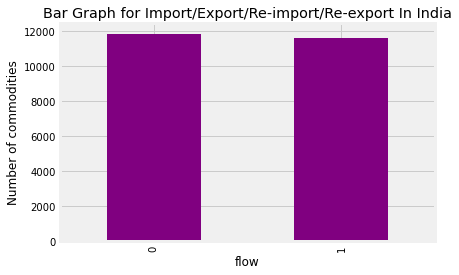

In [117]:
ind.groupby('flow').size().plot(kind='bar',color='purple',xlabel='flow',ylabel='Number of commodities',title='Bar Graph for Import/Export/Re-import/Re-export In India')

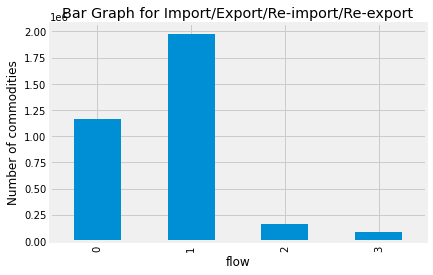

In [118]:
dataset.groupby('flow').size().plot(kind='bar',xlabel='flow',ylabel='Number of commodities',title='Bar Graph for Import/Export/Re-import/Re-export')

In [119]:
ind1=ind.loc[ind['year'] ==2016 ]
ind1.reset_index(drop=True, inplace=True)
ind1

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,India,2016,10210,"Bovine animals, live pure-bred breeding",1,69882,17767.00000000,2,13.00000000,0
1,India,2016,10290,"Bovine animals, live, except pure-bred breeding",0,25740,8581.00000000,2,339.00000000,0
2,India,2016,10310,"Swine, live pure-bred breeding",0,145414,32789.00000000,2,2365.00000000,0
3,India,2016,10391,"Swine, live except pure-bred breeding < 50 kg",0,19349,9627.00000000,2,325.00000000,0
4,India,2016,10392,"Swine, live except pure-bred breeding > 50 kg",0,30,22.00000000,2,2.00000000,0
...,...,...,...,...,...,...,...,...,...,...
2284,India,2016,970400,"Used postage and revenue stamps, first day cov...",0,11882,565.00000000,9,565.00000000,95
2285,India,2016,970500,Collections and collectors pieces,1,1747,50.00000000,9,50.00000000,95
2286,India,2016,970500,Collections and collectors pieces,0,211830,3638.00000000,9,3638.00000000,95
2287,India,2016,970600,Antiques older than one hundred years,1,307199,809.00000000,9,809.00000000,95


In [120]:
ind2016=ind.loc[ind['year'] == 2016]
ind2016.reset_index(drop=True, inplace=True)
ind2016

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,India,2016,10210,"Bovine animals, live pure-bred breeding",1,69882,17767.00000000,2,13.00000000,0
1,India,2016,10290,"Bovine animals, live, except pure-bred breeding",0,25740,8581.00000000,2,339.00000000,0
2,India,2016,10310,"Swine, live pure-bred breeding",0,145414,32789.00000000,2,2365.00000000,0
3,India,2016,10391,"Swine, live except pure-bred breeding < 50 kg",0,19349,9627.00000000,2,325.00000000,0
4,India,2016,10392,"Swine, live except pure-bred breeding > 50 kg",0,30,22.00000000,2,2.00000000,0
...,...,...,...,...,...,...,...,...,...,...
2284,India,2016,970400,"Used postage and revenue stamps, first day cov...",0,11882,565.00000000,9,565.00000000,95
2285,India,2016,970500,Collections and collectors pieces,1,1747,50.00000000,9,50.00000000,95
2286,India,2016,970500,Collections and collectors pieces,0,211830,3638.00000000,9,3638.00000000,95
2287,India,2016,970600,Antiques older than one hundred years,1,307199,809.00000000,9,809.00000000,95


115/2289 data points remain.


Text(0.5, 1.0, 'Line graph for the column quantity for India in the year 2016')

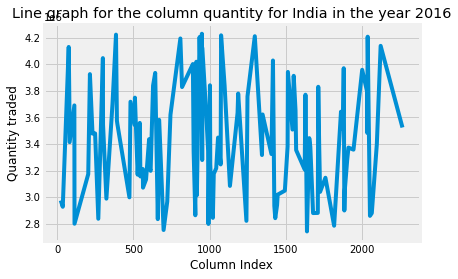

In [121]:
'''Line graph for the column quantity for India in the year 2016'''
size=len(ind2016)
y = ind2016['quantity']
removed_outliers = y.between(y.quantile(0.7), y.quantile(.75))

print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

plt.plot(y[removed_outliers])
plt.xlabel('Column Index')
plt.ylabel('Quantity traded')
plt.title('Line graph for the column quantity for India in the year 2016')

Text(0.5, 1.0, 'Weight in kg of commodities belonging to category 3 that were shipped from or to India in 2016')

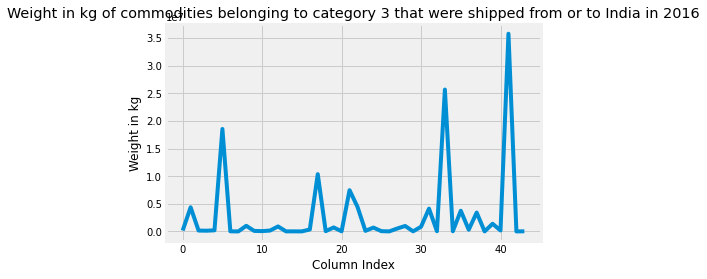

In [122]:
'''Weight in kg of commodities belonging to category 3 that were shipped from or to India in 2016'''
ind2016_cat3=ind2016.loc[ind2016['category'] == 3]
ind2016_cat3.reset_index(drop=True, inplace=True)
ind2016_cat3
size=len(ind2016_cat3)
y = ind2016_cat3['weight_kg']
removed_outliers = y.between(y.quantile(0), y.quantile(1))

plt.plot(y[removed_outliers])
plt.xlabel('Column Index')
plt.ylabel('Weight in kg')
plt.title('Weight in kg of commodities belonging to category 3 that were shipped from or to India in 2016')

Text(0.5, 1.0, 'Box plot for weight in kg traded into/from India in 2016')

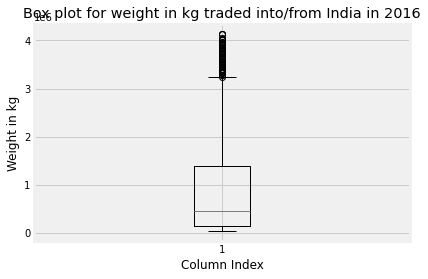

In [123]:
'''Box plot for weight in kg in 2016 traded into/from India'''
y=ind2016['weight_kg']
removed_outliers = y.between(y.quantile(0.25), y.quantile(0.75))

plt.boxplot(y[removed_outliers])
plt.xlabel('Column Index')
plt.ylabel('Weight in kg')
plt.title('Box plot for weight in kg traded into/from India in 2016')

In [124]:
dfTrade=dataset.loc[dataset['flow'] ==1]

In [125]:
dfTrade['trade_usd']

2           1026804
3           2414533
4          14265937
5           2671732
7             26485
             ...   
8209558           9
8209559       57143
8209562         371
8209565        3528
8209573       13520
Name: trade_usd, Length: 1977251, dtype: int64

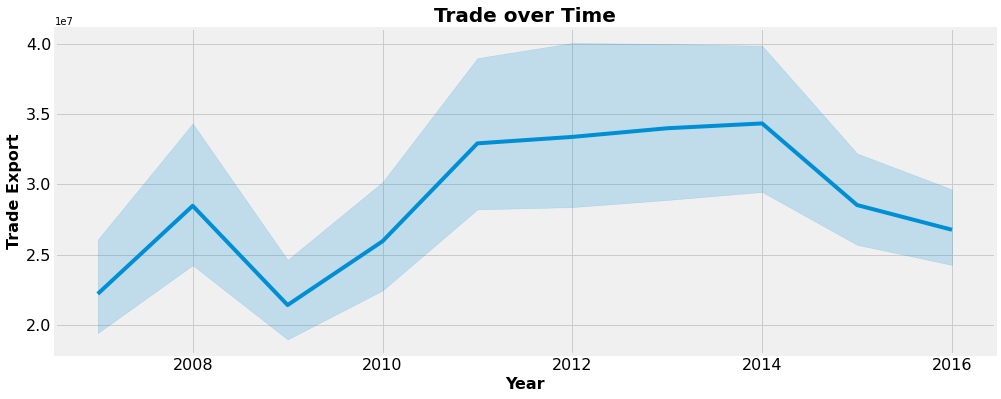

In [126]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(dfTrade['year'], dfTrade['trade_usd'] )

ax.set_title('Trade over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Trade Export', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

Text(0, 0.5, 'Trade value for exports')

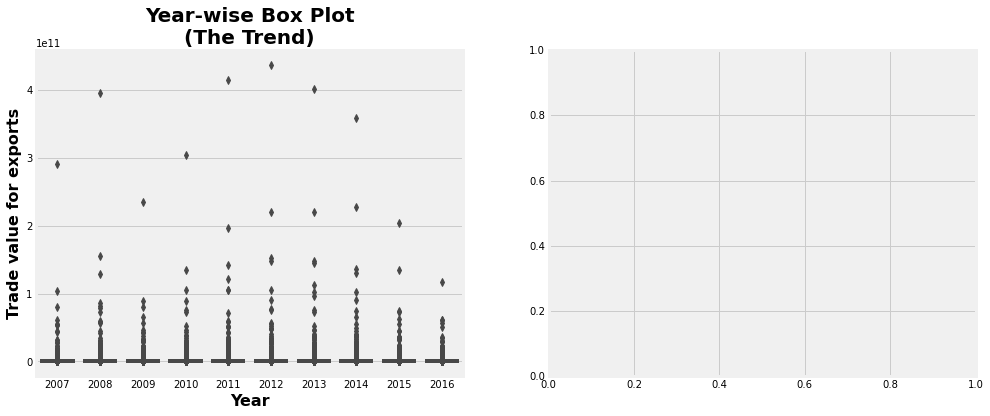

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(dfTrade['year'], dfTrade['trade_usd'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Trade value for exports', fontsize = 16, fontdict=dict(weight='bold'))



In [128]:
corr_matrix = dataset.corr().abs()
corr_matrix

,year,flow,trade_usd,weight_kg,quantity_name,quantity,category
year,1.00000000,0.00598211,0.00292828,0.00179887,0.00122344,0.00051988,0.00121127
flow,0.00598211,1.00000000,0.01114147,0.00510937,0.01192952,0.00026706,0.03082617
trade_usd,0.00292828,0.01114147,1.00000000,0.53166849,0.00144996,0.04399220,0.00552725
weight_kg,0.00179887,0.00510937,0.53166849,1.00000000,0.00431921,0.08272962,0.01131013
quantity_name,0.00122344,0.01192952,0.00144996,0.00431921,1.00000000,0.00129315,0.31695558
quantity,0.00051988,0.00026706,0.04399220,0.08272962,0.00129315,1.00000000,0.00007666
category,0.00121127,0.03082617,0.00552725,0.01131013,0.31695558,0.00007666,1.00000000


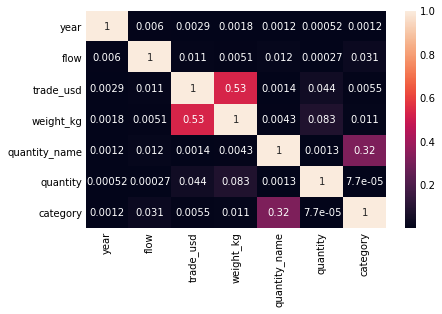

In [129]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [130]:
reg= stat()
reg.lin_reg(df=ind2016, x=["trade_usd"], y=["quantity"])


Regression equation:

-83222527.4677 + (3.1277*trade_usd)

Regression Summary:


----------------------------------------  ---------------
Dependent variables                       ['trade_usd']
Independent variables                     ['quantity']
Coefficient of determination (r-squared)  0.6491
Adjusted r-squared                        0.6489
Root Mean Square Error (RMSE)             3543660562.904
Mean of Y                                 280833589.6806
Residual standard error                   3545385267.4105
No. of Observations                       2289

Regression Coefficients:

Parameter        Estimate    Std Error    t-value    P-value Pr(>|t|)
-----------  ------------  -----------  ---------  ------------------
Intercept    -8.32225e+07  7.43149e+07   -1.11986             0.26289
trade_usd     3.1277       0.0481        65.025               0 


ANOVA Summary:

Source      Df    Sum Squares  Mean Squares            F          Pr(>F)
--------  ----  -------------  --------

In [131]:
normalized = preprocessing.normalize([dataset['trade_usd']])
normalized

array([[3.68290649e-09, 2.39437317e-09, 6.21160170e-07, ...,
        5.63143504e-09, 8.17885935e-09, 2.57944975e-05]])

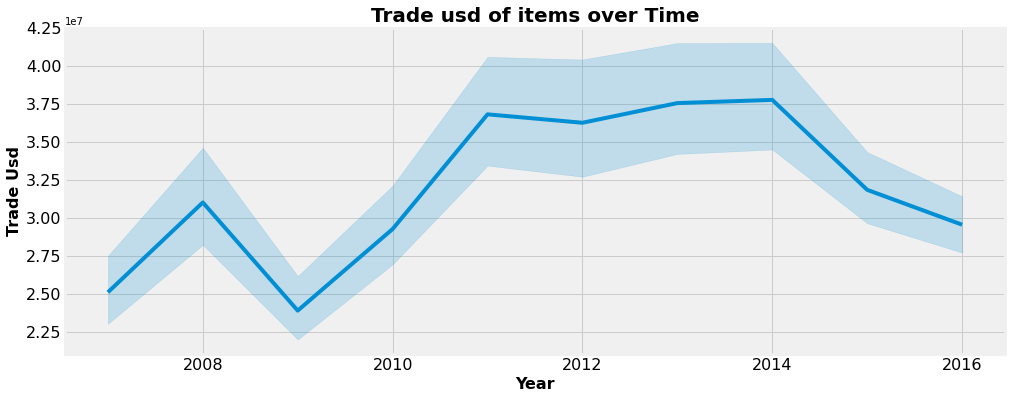

In [132]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(dataset['year'], dataset['trade_usd'] )

ax.set_title('Trade usd of items over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Trade Usd', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

In [133]:
def simple_exp_smooth(d,extra_periods=1,alpha=0.4):  
    

  d = np.array(d)  # Transform the input into a numpy array  

  cols = len(d)  # Historical period length  

  d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  



  f = np.full(cols+extra_periods,np.nan)  # Forecast array  

  f[1] = d[0]  # initialization of first forecast  

    

  # Create all the t+1 forecasts until end of historical period  

  for t in range(2,cols+1):  

    f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  


  f[cols+1:] = f[t]  # Forecast for all extra periods  


  df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Error":d-f})  



  return df  

In [134]:
d = simple_exp_smooth(dataset['trade_usd'],extra_periods=4)

In [135]:
d

,Demand,Forecast,Error
0,6088.00000000,nan,nan
1,3958.00000000,6088.00000000,-2130.00000000
2,1026804.00000000,5236.00000000,1021568.00000000
3,2414533.00000000,413863.20000000,2000669.80000000
4,14265937.00000000,1214131.12000000,13051805.88000000
...,...,...,...
3389215,42639394.00000000,481045.29883411,42158348.70116588
3389216,nan,17344384.77930047,nan
3389217,nan,17344384.77930047,nan
3389218,nan,17344384.77930047,nan


In [136]:
MAE = d["Error"].abs().mean()  

print("MAE:",round(MAE,2)) 

RMSE = np.sqrt((d["Error"]**2).mean())


print("RMSE:",round(RMSE,2))


MAE: 44682222.78
RMSE: 933278409.1


In [137]:
train=dataset[0:2372451] 
test=dataset[2372451:]

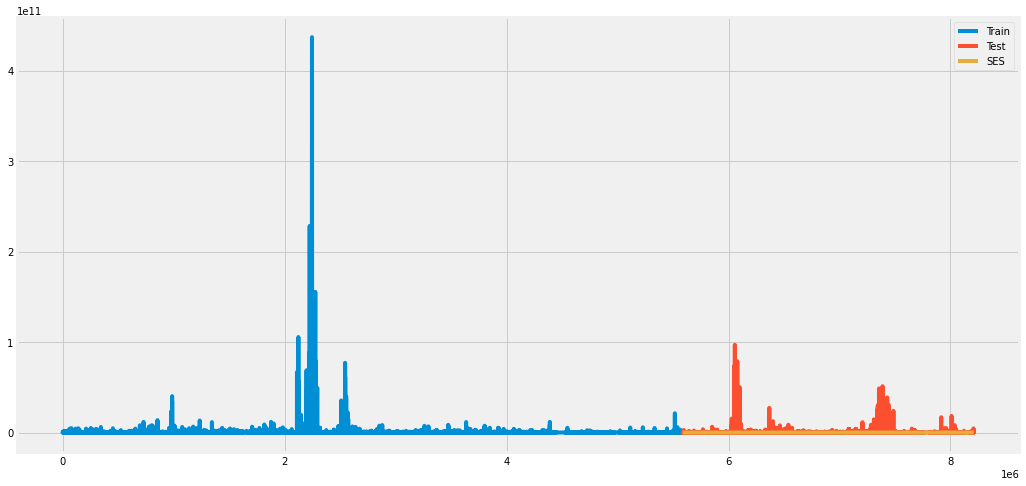

In [138]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['trade_usd'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['trade_usd'], label='Train')
plt.plot(test['trade_usd'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [139]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.trade_usd, y_hat_avg.SES))
print(rms)

469189137.84277326


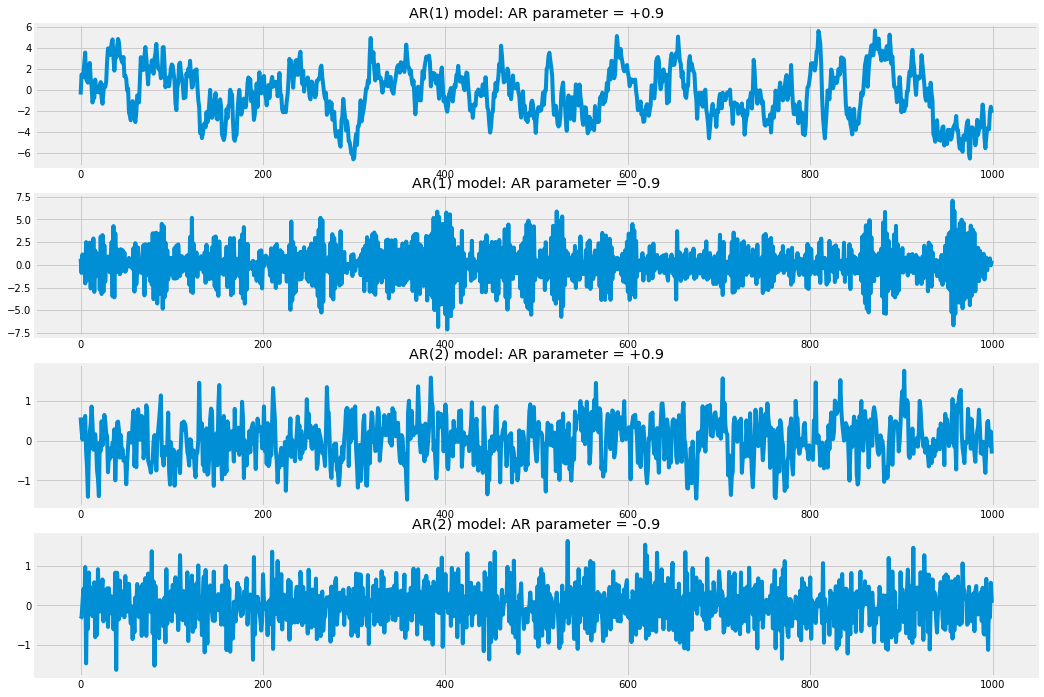

In [140]:
#simulation
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) 
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()


In [141]:
#Forecasting a simulated model
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))
#ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1437.411
Method:                       css-mle   S.D. of innovations              1.018
Date:                Mon, 30 Nov 2020   AIC                           2880.821
Time:                        14:22:41   BIC                           2895.545
Sample:                             0   HQIC                          2886.417
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3148      0.325     -0.968      0.333      -0.952       0.322
ar.L1.y        0.9019      0.014     66.519      0.000       0.875       0.928
                                    Roots           

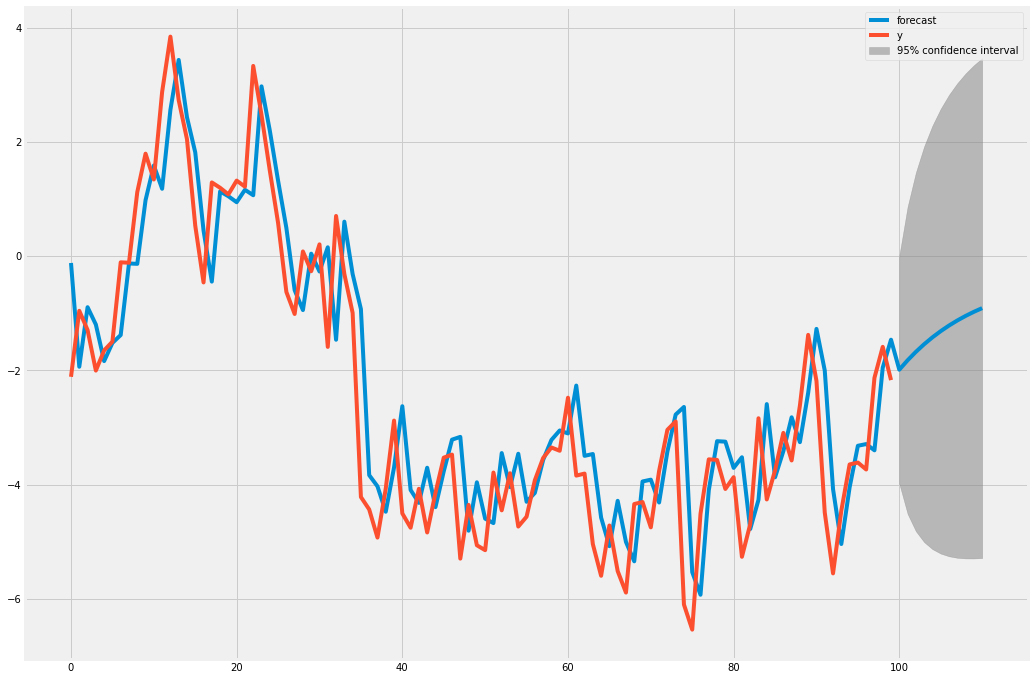

In [142]:
result.plot_predict(start=900, end=1010)
plt.show()
#y is predicted plot. Quite neat!

In [143]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0794308500412122.


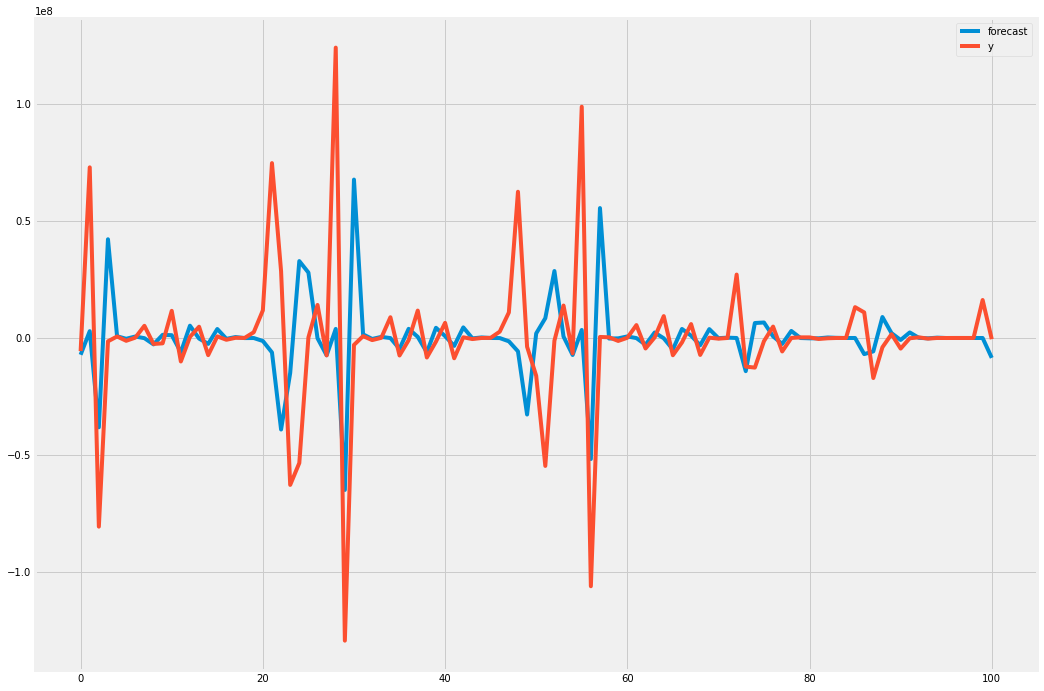

In [144]:
#predicting trade_usd
#observe that the forecasted and predicted value almost similar
usd = ARMA(dataset["trade_usd"].diff().iloc[1:].values, order=(1,0))
res = usd.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:              3389214
Model:                 ARIMA(2, 1, 0)   Log Likelihood           -75805504.486
Method:                       css-mle   S.D. of innovations     1251680545.149
Date:                Mon, 30 Nov 2020   AIC                      151611016.972
Time:                        14:25:26   BIC                      151611069.117
Sample:                             1   HQIC                     151611030.656
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5775   2.61e+05   4.82e-05      1.000   -5.11e+05    5.11e+05
ar.L1.D.y     -1.0566      0.000  -2332.024      0.000      -1.057      -1.056
ar.L2.D.y     -0.5516      0.000  -1217.476      0.0

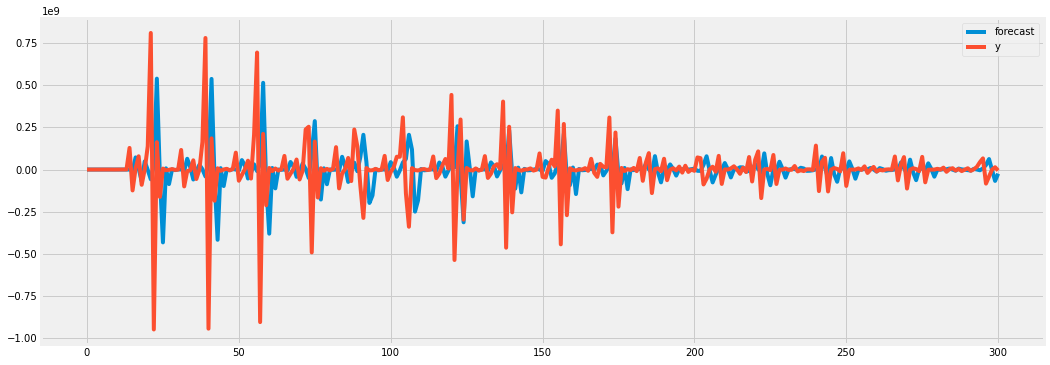

In [145]:
#arima model
rcParams['figure.figsize'] = 16, 6
model = ARIMA(dataset["trade_usd"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [146]:
rmse = math.sqrt(mean_squared_error(dataset["trade_usd"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 375937335.0033791.
